# Imbalanced Data

In [1]:
import pandas as pd 
import numpy as np 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report,\
                            confusion_matrix,\
                            accuracy_score 
from sklearn import metrics 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
data =  pd.read_csv('adult.csv')

In [3]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [6]:
data.replace('?',np.nan,inplace=True)

In [7]:
#Dropping all NULL values
data.dropna(inplace=True)

In [8]:
data['income'].value_counts()

<=50K    34014
>50K     11208
Name: income, dtype: int64

In [9]:
#Encoding the Categorical values to Numericals using LabelEncoder 
from sklearn.preprocessing import LabelEncoder 

Labelenc_workclass = LabelEncoder() 
data['workclass'] = Labelenc_workclass\
            .fit_transform(data['workclass'])

Labelenc_education = LabelEncoder() 
data['education'] = Labelenc_education\
            .fit_transform(data['education'])

Labelenc_marital_status = LabelEncoder() 
data['marital-status'] = Labelenc_marital_status\
            .fit_transform(data['marital-status']) 

Labelenc_occupation = LabelEncoder() 
data['occupation'] = Labelenc_occupation\
            .fit_transform(data['occupation']) 

Labelenc_relationship = LabelEncoder() 
data['relationship'] = Labelenc_relationship\
            .fit_transform(data['relationship']) 

Labelenc_race = LabelEncoder() 
data['race'] = Labelenc_race\
        .fit_transform(data['race']) 

Labelenc_gender = LabelEncoder() 
data['gender'] = Labelenc_gender\
        .fit_transform(data['gender']) 

Labelenc_native_country = LabelEncoder() 
data['native-country'] = Labelenc_native_country\
            .fit_transform(data['native-country']) 

Labelenc_income = LabelEncoder() 
data['income'] = Labelenc_income\
        .fit_transform(data['income']) 

In [10]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,2,226802,1,7,4,6,3,2,1,0,0,40,38,0
1,38,2,89814,11,9,2,4,0,4,1,0,0,50,38,0
2,28,1,336951,7,12,2,10,0,4,1,0,0,40,38,1
3,44,2,160323,15,10,2,6,0,2,1,7688,0,40,38,1
5,34,2,198693,0,6,4,7,1,4,1,0,0,30,38,0


In [12]:
# Putting feature variable to X
X = data.drop(['income'],axis=1)
# Putting response variable to y
y = data['income']

In [13]:
X_train, X_test, y_train, y_test = train_test_split\
                    (X,y,\
                    test_size=0.20, \
                    random_state=123) 

In [14]:
clf_random = RandomForestClassifier(random_state=0)

In [15]:
clf_random.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [16]:
y_pred=clf_random.predict(X_test)

In [17]:
print(classification_report(y_test, y_pred))             

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      6808
           1       0.74      0.63      0.68      2237

    accuracy                           0.85      9045
   macro avg       0.81      0.78      0.79      9045
weighted avg       0.85      0.85      0.85      9045



In [18]:
cm = confusion_matrix(y_test, y_pred)  

cm_df = pd.DataFrame(cm,\
            index = ['<=50K', '>50K'], \
            columns = ['<=50K', '>50K']) 

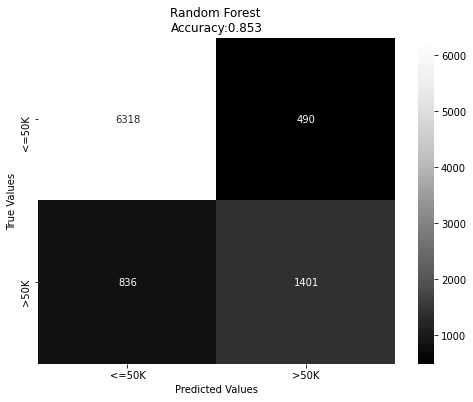

In [19]:
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,fmt='g',cmap='Greys_r')
plt.title('Random Forest \nAccuracy:{0:.3f}'\
    .format(accuracy_score(y_test, y_pred)))
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()